In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(x):
    #return np.sin(-np.sum(x)*50.)
    #return np.exp(-np.sum(x-0.5)**2./10)#the sum sums x's. I do this just to prove that I can use any number of dimensions.
    #return ( np.exp(-x[0]**2)+np.sin(x[1]) )*np.tanh(np.sum(x[2:]))
    return np.sum(x)#the integral from 0 to 1 is Ndim/2.
    
    
#The actual Monte Carlo algorithm.    
def MC(func,Ndim,Nt=1000):
    s=[]
    for i in range(Nt):
        x=np.random.rand(Ndim)#get x for every dimension.
        s.append(func(x))
    return np.mean(s), np.var(s,ddof=1)/Nt


In [6]:
Ndim=500#Number of dimensions (easy!!).

N_tot=500
N_batches=1000
I=[]
V=[]
for i in np.arange(N_batches):
    _I,_V=MC(func,Ndim,N_tot)
    I.append(_I)
    V.append(_V)
    if np.mod(i,50)==0:
        print ('i='+str(i)+':\t', 'integral estimate', _I, '+/-', np.sqrt(_V) )

integral=np.mean(I)#You can also use the least squares estimator (see the scripts in Accept-Reject).
sigma= np.sqrt(np.mean(V))#the variance of the estimator I is sigma^2= 1/N_batches sum_i var(I_i) (the mean var(I_i))
chi=(I-np.mean(I))/np.sqrt(V)

print ()
print ('integral', integral)
print ('sigma', sigma)
print( 'chi^2/dof',np.sum(chi**2)/(N_batches-1.))

i=0:	 integral estimate 250.17855140923913 +/- 0.29291311496200595
i=50:	 integral estimate 250.0827935388175 +/- 0.293986730086187
i=100:	 integral estimate 250.5849388993472 +/- 0.29488434993803403
i=150:	 integral estimate 249.8897922696789 +/- 0.2828753367071886
i=200:	 integral estimate 249.67724482263304 +/- 0.2819535618137372
i=250:	 integral estimate 249.90038601275728 +/- 0.2979766895102266
i=300:	 integral estimate 249.6048198074334 +/- 0.2919893237160738
i=350:	 integral estimate 249.8299549464375 +/- 0.2901594884695457
i=400:	 integral estimate 249.2325322649587 +/- 0.2803462798170628
i=450:	 integral estimate 249.65474406541716 +/- 0.2888515247308452
i=500:	 integral estimate 249.8578824227787 +/- 0.29812827799605435
i=550:	 integral estimate 249.92671094865617 +/- 0.26960086897474556
i=600:	 integral estimate 249.32702336568386 +/- 0.27121906186306377
i=650:	 integral estimate 249.89558128286282 +/- 0.2942179682619488
i=700:	 integral estimate 249.87880756310253 +/- 0.298

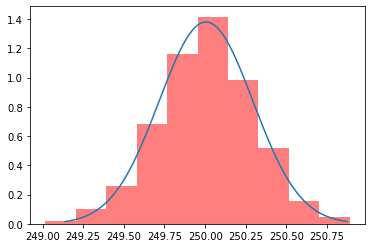

In [9]:
def _gauss(x,mu,sigma):
    return 1/(2*np.pi*sigma**2)**(1/2.)*np.exp(-(x-mu)**2/(2*sigma**2))
gauss=np.vectorize(_gauss)



'''
This plot shows the implication of the CLT.
As you can see, the histogram made by the results 
from the batches coincides with a gaussian with the estimated 
mean 
'''

#plot a gaussian with mean=I and variance=sigma (the variance of I).
x=np.arange(integral-3*sigma,integral+3*sigma,sigma/1000.) #plot +/- 3σ 
y=gauss(x,np.mean(I),sigma)
plt.plot(x,y)


#plot the histogram of a gauss sample of size N_batches with mean=I and variance=sigma (the variance of I) .
#plt.hist( np.random.normal(integral, sigma , N_batches),color='black',density=True)

plt.hist(I,alpha=0.5,color='r',density=True)

plt.show()